### 灰度图

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loss_function(present_center, pre_center):
  '''
  损失函数，计算上一次与当前聚类中的差异（像素差的平方和）
  :param present_center: 当前聚类中心
  :param pre_center: 上一次聚类中心
  :return:　损失值
  '''
  present_center = np.array(present_center)
  pre_center = np.array(pre_center)
  return np.sum((present_center - pre_center)**2)


In [3]:
def classifer(intput_signal, center):
  '''
  分类器（通过当前的聚类中心，给输入图像分类）
  :param intput_signal: 输入图像
  :param center: 聚类中心
  :return:　标签矩阵
  '''
  input_row, input_col= intput_signal.shape # 输入图像的尺寸

  pixls_labels = np.zeros((input_row, input_col)) # 储存所有像素标签

  pixl_distance_t = [] # 单个元素与所有聚类中心的距离，临时用

  for i in range(input_row):
    for j in range(input_col):
      # 计算每个像素与所有聚类中心的差平方
      for k in range(len(center)):
        distance_t = np.sum(abs((intput_signal[i, j]).astype(int) - center[k].astype(int))**2)
        pixl_distance_t.append(distance_t)
      # 差异最小则为该类
      pixls_labels[i, j] = int(pixl_distance_t.index(min(pixl_distance_t)))
      # 清空该list，为下一个像素点做准备
      pixl_distance_t = []
  return pixls_labels


In [4]:
def k_means(input_signal, center_num, threshold):
  '''
  基于k-means算法的图像分割（适用于灰度图）
  :param input_signal:　输入图像
  :param center_num:　聚类中心数目
  :param threshold:　迭代阈值
  :return:
  '''
  input_signal_cp = np.copy(input_signal) # 输入信号的副本
  input_row, input_col = input_signal_cp.shape # 输入图像的尺寸
  pixls_labels = np.zeros((input_row, input_col)) # 储存所有像素标签

  # 随机初始聚类中心行标与列标
  initial_center_row_num = [i for i in range(input_row)]
  random.shuffle(initial_center_row_num)
  initial_center_row_num = initial_center_row_num[:center_num]

  initial_center_col_num = [i for i in range(input_col)]
  random.shuffle(initial_center_col_num)
  initial_center_col_num = initial_center_col_num[:center_num]

  # 当前的聚类中心
  present_center = []
  for i in range(center_num):
    present_center.append(input_signal_cp[initial_center_row_num[i], initial_center_row_num[i]])
  pixls_labels = classifer(input_signal_cp, present_center)

  num = 0 # 用于记录迭代次数
  while True:
    pre_centet = present_center.copy() # 储存前一次的聚类中心
    # 计算当前聚类中心
    for n in range(center_num):
      temp = np.where(pixls_labels == n)
      present_center[n] = sum(input_signal_cp[temp].astype(int)) / len(input_signal_cp[temp])
    # 根据当前聚类中心分类
    pixls_labels = classifer(input_signal_cp, present_center)
    # 计算上一次聚类中心与当前聚类中心的差异
    loss = loss_function(present_center, pre_centet)
    num = num + 1
    print("Step:"+ str(num) + "  Loss:" + str(loss))
    # 当损失小于迭代阈值时，结束迭代
    if loss <= threshold:
      break
  return pixls_labels

In [5]:
def show_image(origin,pic_new):
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(17,17))
    row_num = 0
    m = origin.shape[0]
    ax[0].imshow(origin,cmap='Greys_r')   
    ax[0].set_title("Original Image")

    ax[1].imshow(pic_new,cmap='Greys_r')
    ax[1].set_title("new image")

    plt.show()

In [6]:
img = plt.imread('oct.jpeg')
labels = k_means(img,5,5)

Step:1  Loss:2744.7545383636157
Step:2  Loss:826.6559642270806
Step:3  Loss:246.0342881409836
Step:4  Loss:88.68336520558296
Step:5  Loss:31.787176449599656
Step:6  Loss:11.792350992354718
Step:7  Loss:10.057428407398678
Step:8  Loss:3.5659763486559655


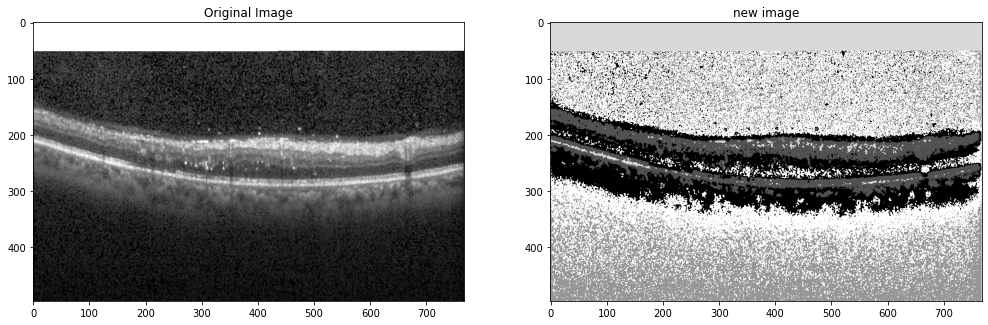

In [7]:
show_image(img,labels)

### RGB图

In [8]:
import cv2
import PIL.Image as image         #加载pil的包
from sklearn.cluster import KMeans

In [9]:
def loadData(filePath):
    f = open(filePath,'rb')       #以二进制读取文件
    data = []
    img = image.open(f)           #返回图片的像素值
    m,n = img.size                #返回图片的大小
    for i in range(m):  #将每个像素点RGB颜色处理到0-1范围内并存放data
        for j in range(n):
            x,y,z = img.getpixel((i,j))
            data.append([x/256.0,y/256.0,z/256.0])
    f.close()
    return np.mat(data),m,n
path = 'tes_img.jpg' 
imgData,row,col = loadData(path)
label = KMeans(n_clusters=4).fit_predict(imgData)  #图片聚成4类
 
label = label.reshape([row,col])
pic_new = image.new("L", (row, col))
for i in range(row):                          #根据所属类别给图片添加灰度
    for j in range(col):
        pic_new.putpixel((i,j), int(256/(label[i][j]+1)))
pic_new.save("result-1.jpg", "JPEG")

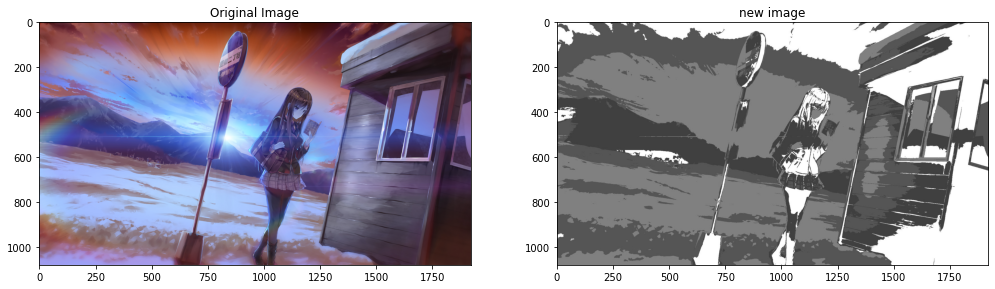

In [10]:
img = cv2.imread(path)
pic_new = cv2.imread("result-1.jpg")
show_image(img,pic_new)